# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

In [3]:
# Import the csv into data frame
insu_df = pd.read_csv("insurance.csv")

In [4]:
insu_df.shape

(1338, 7)

In [5]:
insu_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insu_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Question 2 - Check the distribution of expenses(charges) and state your insights.

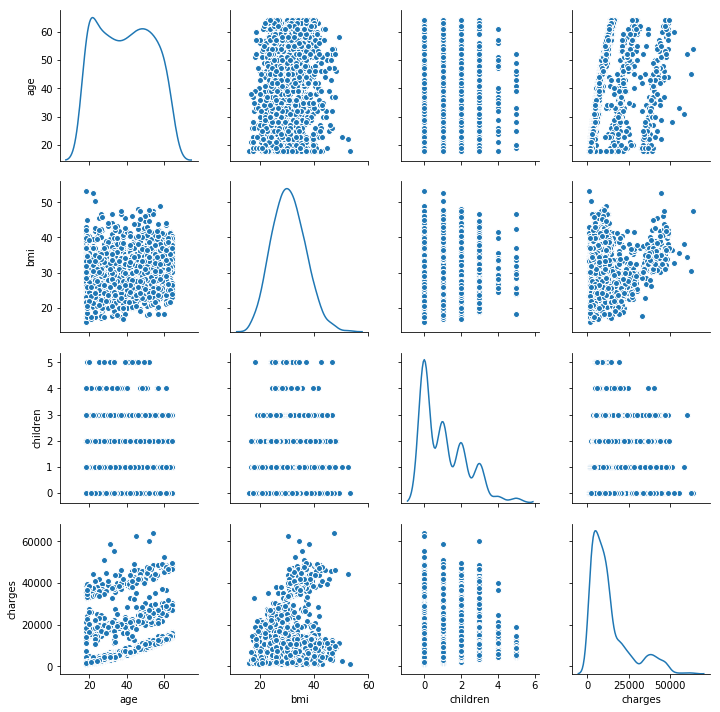

In [7]:
# Plotting all variables on scatter matrix
sns.pairplot(insu_df, diag_kind='kde')

BMI is normally distributed, however charges has outliers

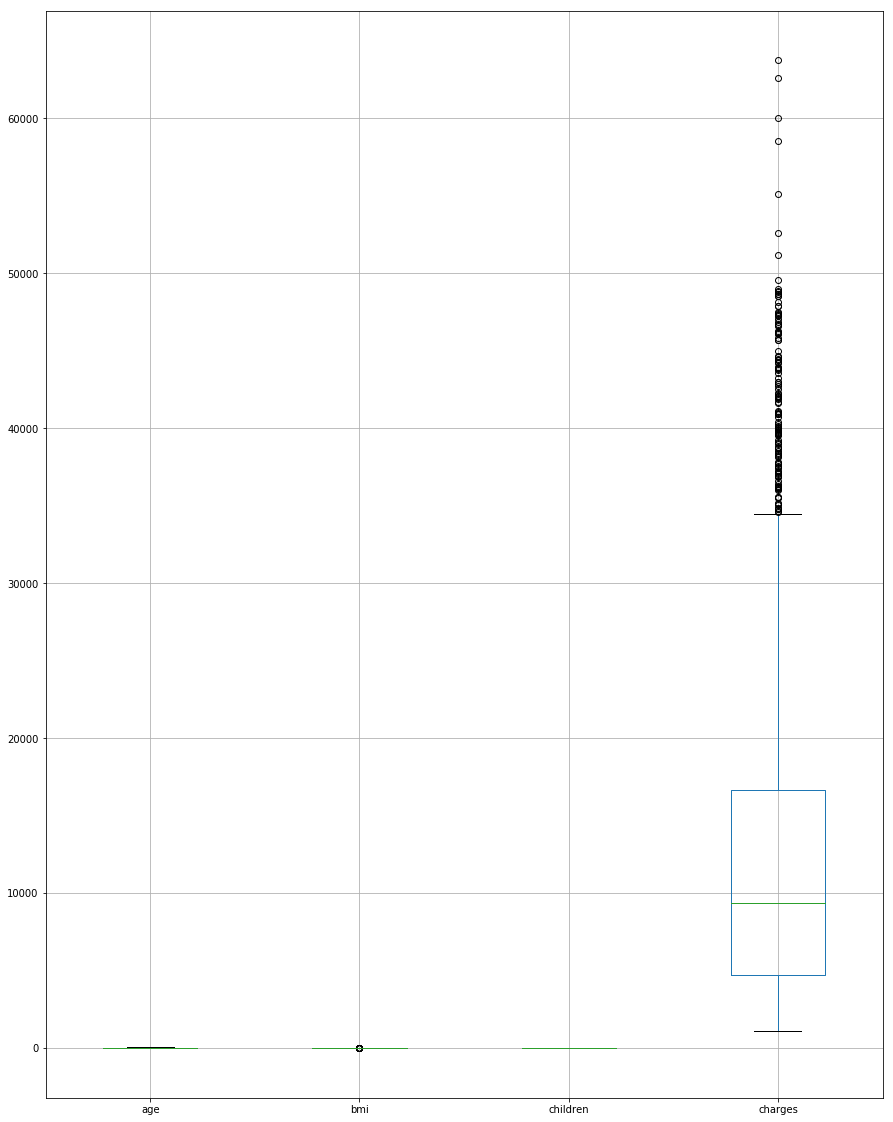

In [8]:
insu_df.boxplot(figsize = [15,20])

Charges has many outliers beyond 35000, but its is not being treated as there is a strong corelation with BMI and age

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [9]:
insu_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


BMI and Age have a strong co-relation with Charges

# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [10]:
x = insu_df.drop(labels= "charges" , axis = 1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [11]:
y = insu_df["charges"]
y.shape

(1338,)

In [12]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [13]:
# Getting the number equialent of categorical values and droping the redundant column
x_train = pd.get_dummies(x_train, columns=['sex','smoker','region'],drop_first=True)
x_test = pd.get_dummies(x_test, columns=['sex','smoker','region'],drop_first=True)

In [14]:
x_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
744,50,26.41,0,1,0,1,0,0
363,21,26.40,1,0,0,0,0,1
10,25,26.22,0,1,0,0,0,0
970,50,28.16,3,0,0,0,1,0
634,51,39.70,1,1,0,0,0,1


In [15]:
x_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
559,19,35.53,0,1,0,1,0,0
1087,57,31.54,0,1,0,1,0,0
1020,51,37.00,0,1,0,0,0,1
460,49,36.63,3,0,0,0,1,0
802,21,22.30,1,1,0,0,0,1


In [16]:
x_test.dtypes


age                   int64
bmi                 float64
children              int64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [17]:
x_train.dtypes

age                   int64
bmi                 float64
children              int64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [18]:
x_test["sex_male"] = x_test["sex_male"].astype('int64')
x_test["smoker_yes"] = x_test["smoker_yes"].astype('int64')
x_test["region_northwest"] = x_test["region_northwest"].astype('int64')
x_test["region_southeast"] = x_test["region_southeast"].astype('int64')
x_test["region_southwest"] = x_test["region_southwest"].astype('int64')

In [19]:
x_test.dtypes

age                   int64
bmi                 float64
children              int64
sex_male              int64
smoker_yes            int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

In [20]:
x_train["sex_male"] = x_train["sex_male"].astype('int64')
x_train["smoker_yes"] = x_train["smoker_yes"].astype('int64')
x_train["region_northwest"] = x_train["region_northwest"].astype('int64')
x_train["region_southeast"] = x_train["region_southeast"].astype('int64')
x_train["region_southwest"] = x_train["region_southwest"].astype('int64')

In [21]:
x_train.dtypes

age                   int64
bmi                 float64
children              int64
sex_male              int64
smoker_yes            int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

# Question 6 - Train your model.

In [22]:
lr_model = LinearRegression()

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [23]:
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Coefficient 
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr_model.coef_[idx]))

The coefficient for age is 251.68186514630253
The coefficient for bmi is 322.3891068370295
The coefficient for children is 344.9642552960657
The coefficient for sex_male is -282.7963466087989
The coefficient for smoker_yes is 24059.390476923367
The coefficient for region_northwest is -304.0900976542827
The coefficient for region_southeast is -939.3420969057178
The coefficient for region_southwest is -868.1885586576706


In [25]:
# Intercept
intercept = lr_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -11039.238418561546


# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [26]:
y_predict = lr_model.predict(x_test)
y_predict

array([ 4.61031554e+03,  1.28878939e+04,  1.25739488e+04,  1.31978366e+04,
        6.29337182e+02,  3.23572576e+04,  1.28537784e+04,  1.22736625e+04,
        3.86516404e+03,  2.99041114e+04,  1.10305362e+04,  1.74288935e+04,
        8.67020810e+03,  8.35745971e+03,  3.36875366e+03,  1.03165857e+04,
        3.99922136e+03,  6.86650933e+03,  1.49892640e+04,  1.44001670e+04,
        1.24848600e+04,  3.32554533e+04,  9.17711110e+03,  8.96942018e+03,
        3.19978311e+03,  8.19525844e+03,  9.35574417e+03,  1.08473779e+04,
        7.69460470e+03,  4.43644785e+03,  1.40732518e+04,  5.76139449e+03,
        3.46834014e+04,  2.75058813e+04,  3.35301907e+04,  9.55351707e+03,
        3.07999586e+04,  2.68197434e+04,  1.52082623e+04,  3.42179660e+04,
        6.39728074e+03,  1.40583847e+04,  1.06124944e+04,  1.49646068e+04,
        4.19302227e+03,  1.29975937e+04,  4.50078406e+03,  2.90583927e+04,
        7.31156998e+03,  1.39664554e+04,  1.32690410e+04,  1.21999606e+04,
        2.04035422e+03,  

In [27]:
mse = mean_squared_error(y_test,y_predict)
mse

36761456.35201325

In [28]:
rmse = math.sqrt(mse)
rmse

6063.12265685045

In [29]:
r2score = r2_score(y_test,y_predict)
r2score

0.7405989316927212

In [30]:
lr_model.score(x_train, y_train)

0.7545557492633161

Training accuracy is 75.45%

In [31]:
lr_model.score(x_test, y_test)

0.7405989316927211

Testing accuracy is 74.05%

# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [32]:
# Import the csv into data frame
iris_df = pd.read_csv("iris.csv")

In [33]:
iris_df.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
iris_df.shape

(150, 5)

In [35]:
iris_df.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

In [36]:
iris_df["Class"] = iris_df.Class.astype('category')

In [37]:
iris_df.dtypes

Sepal Length (in cm)     float64
Sepal Width in (cm)      float64
Petal length (in cm)     float64
Petal width (in cm)      float64
Class                   category
dtype: object

In [38]:
x = iris_df.drop(labels= "Class" , axis = 1)
x.shape

(150, 4)

In [39]:
x.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
y = iris_df["Class"]
y.shape

(150,)

In [41]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

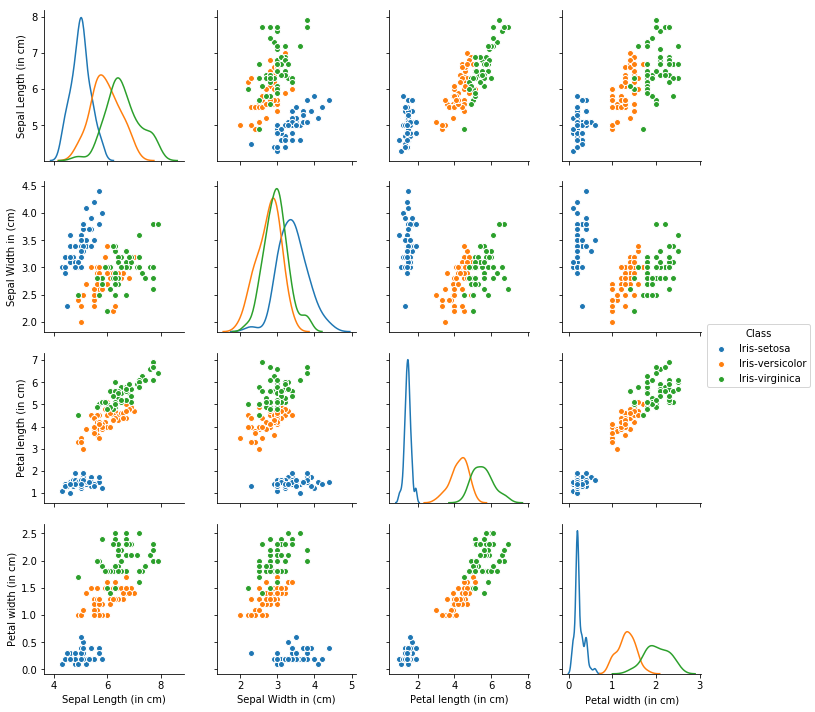

In [42]:
# Plotting all variables on scatter matrix
sns.pairplot(iris_df, diag_kind='kde',hue='Class')

There is a correlation between the class and other features. Data is normally distributed for all the features

In [43]:
iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


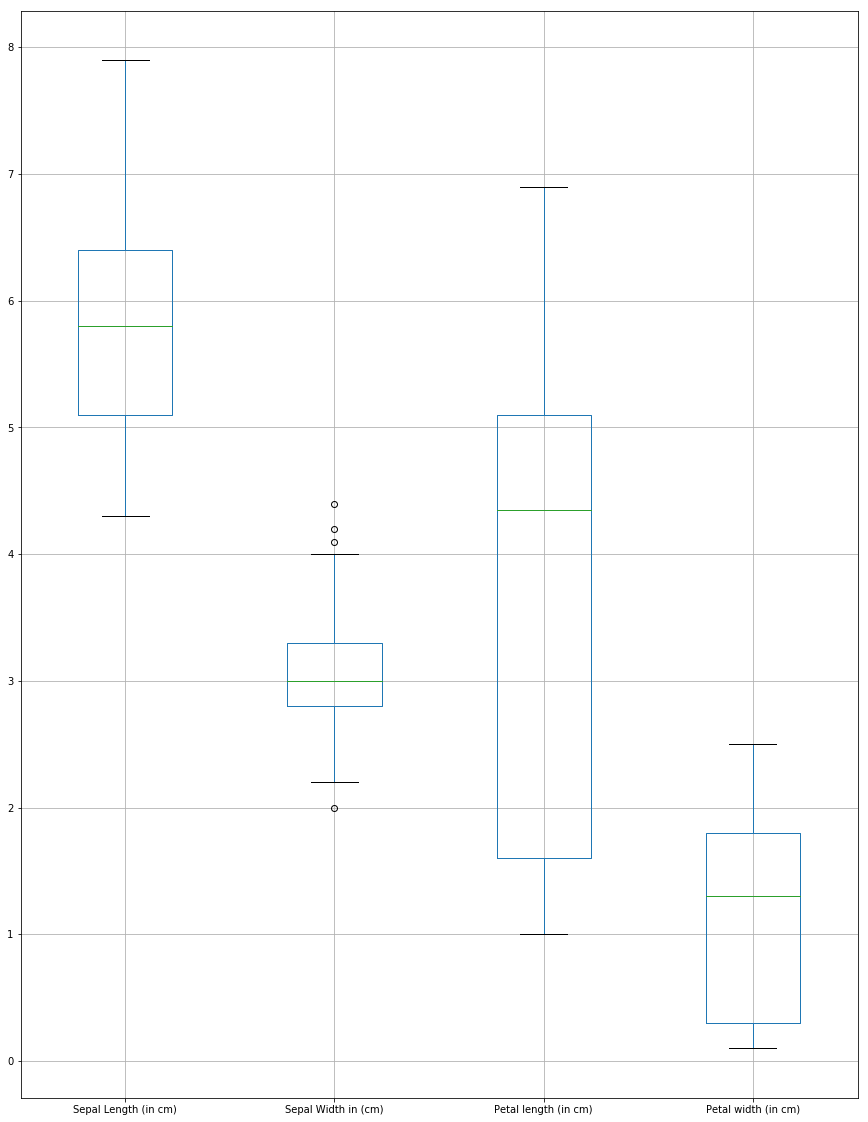

In [44]:
iris_df.boxplot(figsize = [15,20])

There are no major outliers that need to be treated

## Question 11- Do Feature Scaling 

In [45]:
x_train_z = x_train.apply(zscore)   
x_train_z.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,2.918301e-16,2.363189e-16,-5.286776e-17,-1.395709e-16
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.784607e+00,-2.500372e+00,-1.539745e+00,-1.395772e+00
25%,-9.517902e-01,-5.646001e-01,-1.202457e+00,-1.267663e+00
50%,0.000000e+00,-8.065715e-02,2.591225e-01,1.415293e-01
75%,7.138426e-01,6.452572e-01,7.650540e-01,7.820715e-01
max,2.260502e+00,3.306943e+00,1.776917e+00,1.678830e+00


In [46]:
x_test_z = x_test.apply(zscore)   
x_test_z.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01
mean,-1.386545e-15,-9.695948e-16,4.231183e-16,3.191891e-16
std,1.011300e+00,1.011300e+00,1.011300e+00,1.011300e+00
min,-1.981755e+00,-1.920658e+00,-1.523793e+00,-1.433857e+00
25%,-6.986042e-01,-6.433731e-01,-1.289763e+00,-1.152709e+00
50%,-1.853440e-01,-2.176115e-01,4.069516e-01,1.124594e-01
75%,7.128614e-01,6.339117e-01,6.994887e-01,8.153305e-01
max,2.509272e+00,2.336958e+00,1.518592e+00,1.658776e+00


## Question 12- Train and Fit NaiveBayes Model

In [47]:
nb_model = GaussianNB()

In [48]:
nb_model.fit(x_train, y_train)

GaussianNB(priors=None)

In [49]:
y_predict = nb_model.predict(x_test)
y_predict

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype='<U15')

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [50]:
nb_model.score(x_train, y_train)

0.9523809523809523

Training accuracy is 95.23%

In [51]:
nb_model.score(x_test, y_test)

0.9333333333333333

Testing accuracy is 93.33%

In [52]:
print(metrics.confusion_matrix(y_test, y_predict))

[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


Recall for Iris-setosa is 14/14+0+0 = 100%

Recall for Iris-versicolor is 16/0+16+2 =  88%

Recall for Iris-virginica is 12/0+1+12 =  92%

# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [53]:
RF_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0 )

In [54]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [55]:
y_predict  = RF_model.predict(x_test)
acc=metrics.accuracy_score(y_test,y_predict)
print(acc)

0.9555555555555556


Accuracy is 95.56% which is better than Naive Bayes

## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [56]:
abcl_model = AdaBoostClassifier(base_estimator=RF_model,n_estimators= 51)
abcl_model.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=51, random_state=None)

In [57]:
y_predict  = abcl_model.predict(x_test)
acc = metrics.accuracy_score(y_test,y_predict)
print(acc)

0.9555555555555556


Accuracy is the same as Random Forest 95.56%